#### **This notebook contains the functions used to clean the spectra.**

Import Libraries

In [1]:
import sys
sys.path.append('..')  # Adds the parent directory to the path so Python can find the `Cleaning_and_Evaluation` package
from Cleaning_and_Evaluation import *
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import seaborn as sns
import matplotlib.pyplot as plt
from Spectra_Preparation_Functions import *

Read the spectral data

In [2]:
df = pd.read_csv("../data/exosomes.raw_spectrum_1.csv")
#df = pd.read_csv("../data/exosomes.raw_spectrum_400-1800.csv")

In [3]:
# df = df[(df['WaveNumber'] >= 400) & (df['WaveNumber'] <= 1800)]

In [4]:
df

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status
0,201210-1-00,0,200.00000,2709.3699,201210-1,Normal
1,201210-1-00,1,200.68336,2697.1318,201210-1,Normal
2,201210-1-00,2,201.36674,2696.0413,201210-1,Normal
3,201210-1-00,3,202.05011,2678.5925,201210-1,Normal
4,201210-1-00,4,202.73349,2670.8928,201210-1,Normal
...,...,...,...,...,...,...
8023570,210526-3-09,2630,1997.26650,1321.0371,210526-3,Hyperglycemia
8023571,210526-3-09,2631,1997.94980,1316.4056,210526-3,Hyperglycemia
8023572,210526-3-09,2632,1998.63330,1311.2640,210526-3,Hyperglycemia
8023573,210526-3-09,2633,1999.31670,1318.0909,210526-3,Hyperglycemia


#### **Select the chosen cleaning parameters then run the functions**

Choose the Parameters

In [5]:
# # Best Full Spectrum Parameters

lam = 10 ** 7
p = 0.05
window_size = 51
poly_order = 2
despike_ma = 10
despike_threshold = 7


# Best 400-1800 Parameters

# lam = 10 ** 8
# p = 0.01
# window_size = 51
# poly_order = 3

# Standard Parameters
# despike_ma = 25
# despike_threshold = 3.75
# lam = 10 ** 5
# p = 0.001
# window_size = 21
# poly_order = 2

# More parameters from optuna
# despike_ma = 19
# despike_threshold = 5.75
# lam = 10**10
# p = 0.049

# Clean Params for Pagerank weights
# despike_ma = 19
# despike_threshold = 5.75
# lam = 10**8
# p = 0.049
# window_size = 11
# poly_order = 2

# pagerank_cutoff = 0.902461
# despike_ma = 57
# despike_threshold = 3.75
# lam = 10 ** 11
# p = 0.074
# window_size = 51
# poly_order = 3

#### **Here is an example on 1 spectrum**

In [ ]:
sns.set_style('whitegrid')

/tmp/ipykernel_48549/4223251281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Baseline'] = sample.groupby('SpecID')['Absorbance'].transform(lambda x: asls_baseline_correction(x, lam=lam, p=p))
/tmp/ipykernel_48549/4223251281.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Baseline_Corrected_Absorbance'] = sample['Absorbance'] - sample['Baseline']


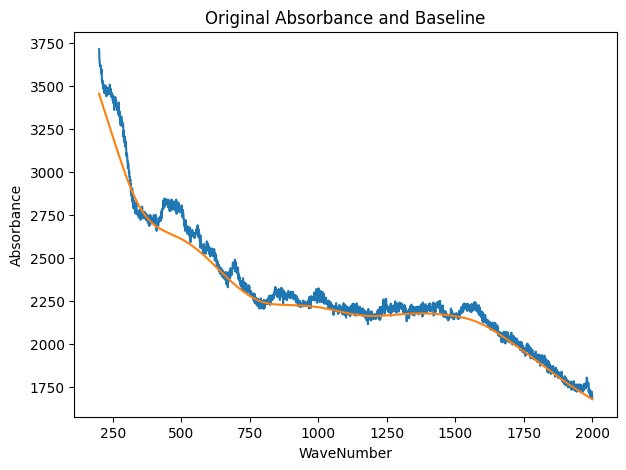

/tmp/ipykernel_48549/4223251281.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Baseline_Corrected_Absorbance'] = sample['Absorbance'] - sample['Baseline']


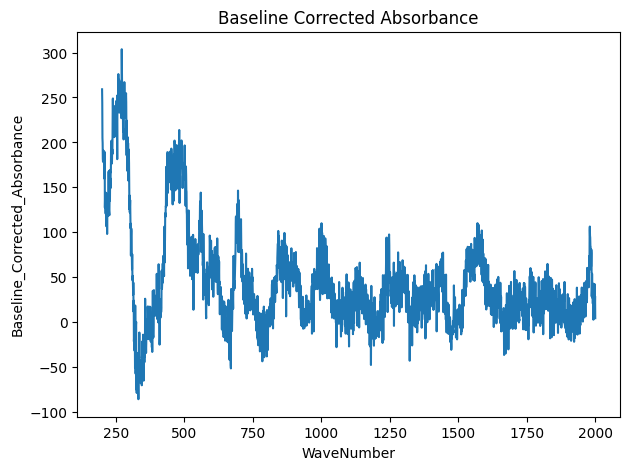

/tmp/ipykernel_48549/4223251281.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Smoothed_Absorbance'] = sample.groupby('SpecID')['Baseline_Corrected_Absorbance'].transform(lambda x: savgol_filter(x, window_size, poly_order, deriv=0))


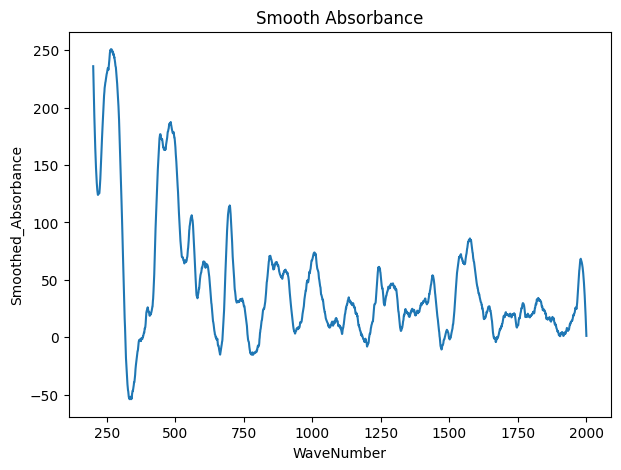

/tmp/ipykernel_48549/4223251281.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Scaled_Absorbance'] = sample.groupby('SpecID')['Smoothed_Absorbance'].transform(lambda x: svn_normalise(x))


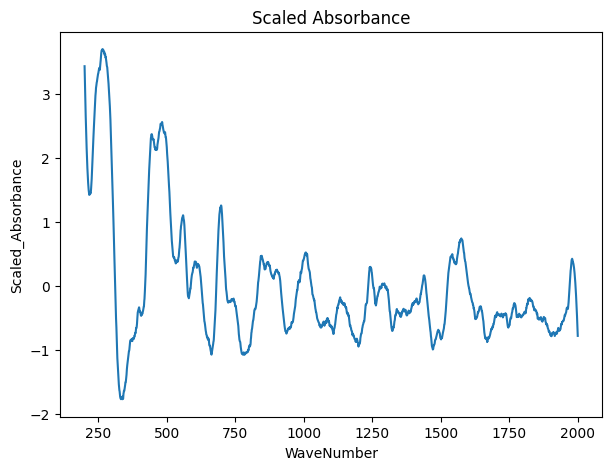

In [7]:
sample = df[df['SpecID'] == "201210-1-19"]
sample['Baseline'] = sample.groupby('SpecID')['Absorbance'].transform(lambda x: asls_baseline_correction(x, lam=lam, p=p))

# Plot 1: Original Absorbance and Baseline
plt.figure(figsize=(7, 5))
sns.lineplot(x="WaveNumber", y="Absorbance", data=sample)
sns.lineplot(x="WaveNumber", y="Baseline", data=sample)
sample['Baseline_Corrected_Absorbance'] = sample['Absorbance'] - sample['Baseline']
plt.title('Original Absorbance and Baseline')
plt.show()

# Plot 2: Baseline Corrected Absorbance
sample['Baseline_Corrected_Absorbance'] = sample['Absorbance'] - sample['Baseline']
plt.figure(figsize=(7, 5))
sns.lineplot(x="WaveNumber", y="Baseline_Corrected_Absorbance", data=sample)
plt.title('Baseline Corrected Absorbance')
plt.show()

# Plot 3: Smooothed Absorrbance
sample['Smoothed_Absorbance'] = sample.groupby('SpecID')['Baseline_Corrected_Absorbance'].transform(lambda x: savgol_filter(x, window_size, poly_order, deriv=0))
plt.figure(figsize=(7, 5))
sns.lineplot(x="WaveNumber", y="Smoothed_Absorbance", data=sample)
plt.title('Smooth Absorbance')
plt.show()

# Plot 4: Scaling
sample['Scaled_Absorbance'] = sample.groupby('SpecID')['Smoothed_Absorbance'].transform(lambda x: svn_normalise(x))
plt.figure(figsize=(7, 5))
sns.lineplot(x="WaveNumber", y="Scaled_Absorbance", data=sample)
plt.title('Scaled Absorbance')
plt.show()